og
      Column1       Date       Cost  Item Number    Type
121  Baseline 2024-01-16  15.000000        10002  Cheese
122  Baseline 2024-02-14  15.000000        10002  Butter
123  Baseline 2024-03-14  15.000000        10002  Butter
124  Baseline 2024-04-14  15.000000        10002  Butter
125  Baseline 2024-05-14  15.000000        10002  Butter
..        ...        ...        ...          ...     ...
721   Current 2033-09-13  19.571598        10002  Cheese
722   Current 2033-10-13  19.571598        10002  Cheese
723   Current 2033-11-13  19.571598        10002  Cheese
724   Current 2033-12-13  19.571598        10002  Cheese
725   Current 2034-01-13  20.158746        10002  Cheese

[242 rows x 5 columns]
wtf
      Column1       Date       Cost  Item Number    Type
121  Baseline 2024-01-16  15.000000        10002  Cheese
122  Baseline 2024-02-14  15.000000        10002  Butter
123  Baseline 2024-03-14  15.000000        10002  Butter
124  Baseline 2024-04-14  15.000000        10002  Butter


C:\Users\CassieLynn\AppData\Local\Temp\ipykernel_668\3390728178.py:375: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



og
      Column1       Date      Cost  Item Number    Type
121  Baseline 2024-07-15  4.374706        10002  Cheese
122  Baseline 2024-08-13  4.374706        10002  Butter
123  Baseline 2024-09-11  4.374706        10002  Butter
124  Baseline 2024-10-12  4.374706        10002  Butter
125  Baseline 2024-11-11  4.374706        10002  Butter
..        ...        ...       ...          ...     ...
721   Current 2034-03-13  5.707999        10002  Cheese
722   Current 2034-04-12  5.707999        10002  Cheese
723   Current 2034-05-13  5.707999        10002  Cheese
724   Current 2034-06-12  5.707999        10002  Cheese
725   Current 2034-07-13  5.879239        10002  Cheese

[242 rows x 5 columns]
wtf
      Column1       Date      Cost  Item Number    Type
121  Baseline 2024-07-15  4.374706        10002  Cheese
122  Baseline 2024-08-13  4.374706        10002  Butter
123  Baseline 2024-09-11  4.374706        10002  Butter
124  Baseline 2024-10-12  4.374706        10002  Butter
125  Baseline 202

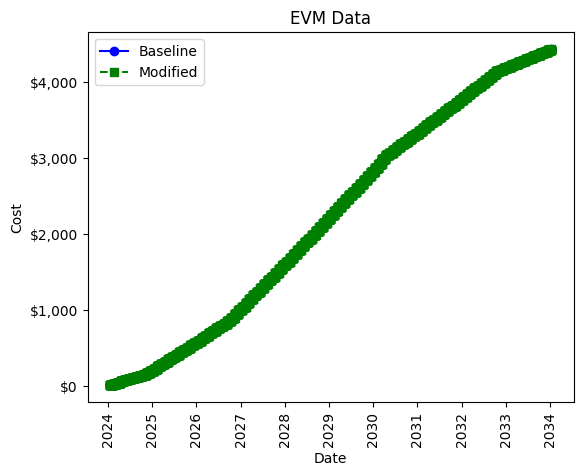

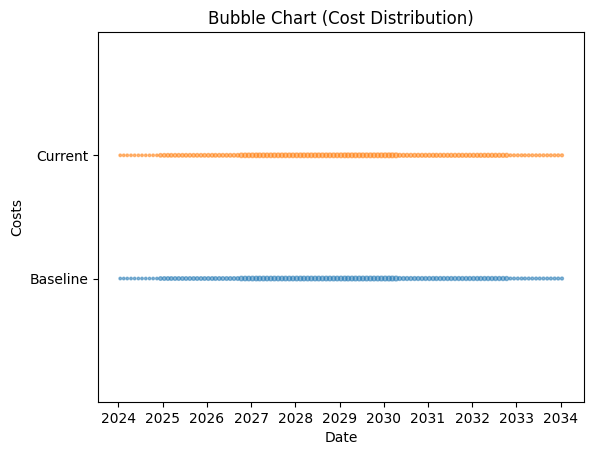

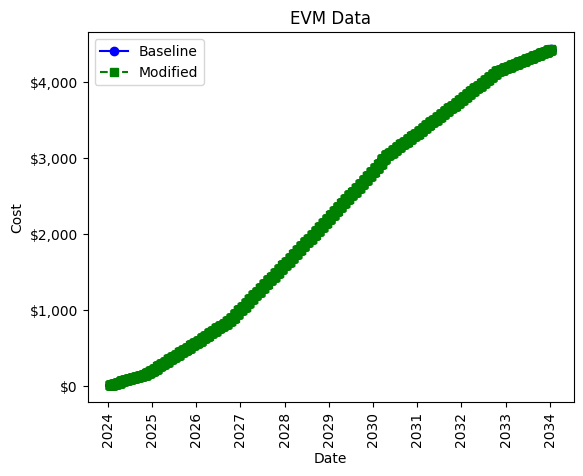

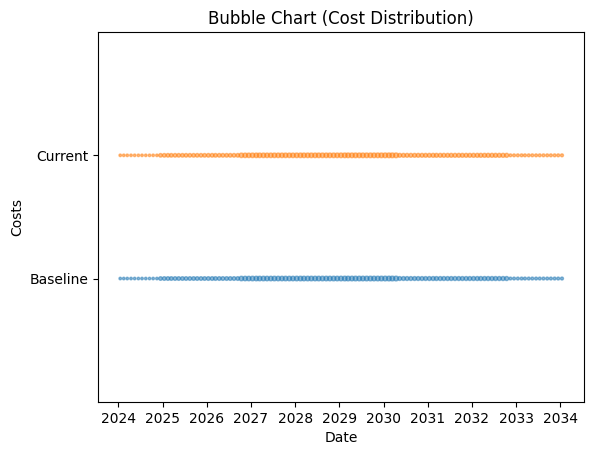

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import tkinter as tk
from tkinter import filedialog, ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import mplcursors  # Importing the mplcursors library
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pyvista as pv
from datetime import timedelta

class EVM_app(tk.Tk):

    def __init__(self):
        super().__init__()
    
        #Initialize variables
        self.data = None  # Initialize data variable
        self.years = []  # Store unique years
        self.title("EVM Impacts Assessment")

        # Set the window to full screen
        screen_width = self.winfo_screenwidth()
        screen_height = self.winfo_screenheight()
        self.geometry(f"{screen_width}x{screen_height}")

        # Configure the grid
        self.grid_columnconfigure(0, weight=1)
        self.grid_columnconfigure(1, weight=1)
        self.grid_columnconfigure(2, weight=1)
        self.grid_columnconfigure(3, weight=1)
        self.grid_columnconfigure(4, weight=1)
        self.grid_columnconfigure(5, weight=1)
        self.grid_columnconfigure(6, weight=1)
        self.grid_columnconfigure(7, weight=1)
        self.grid_columnconfigure(8, weight=1)
        self.grid_columnconfigure(9, weight=1)

        self.grid_rowconfigure(15, weight=1)

        # Initialize chart frames (left and right)
        self.left_frame = tk.Frame(self)
        self.left_frame.grid(row=8, column=0, columnspan=3, sticky="nsew")
        
        self.right_frame = tk.Frame(self)
        self.right_frame.grid(row=8, column=4, columnspan=3, sticky="nsew")

        #Activate upload data button
        self.upload_data_button()
    
    def upload_data_button(self):

        # Add upload buttons
        upload_button = tk.Button(self, text="Upload Dataset", command=self.upload_dataset)
        upload_button.grid(row=1, column=1,  pady=(10, 10), sticky="ew")
    
    def upload_dataset(self):
        file_path = filedialog.askopenfilename(title="Select CSV file", filetypes=[("CSV files", "*.csv")])
        if file_path:
            self.data = pd.read_csv(file_path)

            # Ensure the 'Date' column is parsed as datetime
            self.data['Date'] = pd.to_datetime(self.data['Date'])

            # Extract unique years
            self.years = self.data['Date'].dt.year.unique().tolist()

            self.upload_attrib_data_button()

    def upload_attrib_data_button(self):
        upload_attrib_button = tk.Button(self, text="Upload Attributes", command=self.upload_attrib_dataset)
        upload_attrib_button.grid(row=2, column=1,  pady=(10, 10), sticky="ew")
    
    def upload_attrib_dataset(self):
        file_path = filedialog.askopenfilename(title="Select CSV file", filetypes=[("CSV files", "*.csv")])
        if file_path:
            self.attribute_data = pd.read_csv(file_path)

            # Run code to add dropdowns and populate them
            self.create_filters()
            self.update_dropdowns()

    def create_filters(self):

        # Create input fields for filtering
        self.create_filter_field("Filter Item Number:", row=1, column=2)
           
    def create_filter_field(self, label_text, row, column):
        """Helper function to create a label and dropdown field."""
        label = tk.Label(self, text=label_text)
        label.grid(row=row, column=column, padx=0, pady=5, sticky="e")

        combo = ttk.Combobox(self, state="readonly")
        combo.grid(row=row, column=column + 1, padx=0, pady=5, sticky="w")

        # Bind the combobox selection event
        combo.bind("<<ComboboxSelected>>", self.on_select)
        
        # Dynamically create instance variables to hold the input fields
        setattr(self, f"combo_{label_text.replace(' ', '_').replace(':', '')}", combo)

    def on_select(self, event):
        self.create_filtered_data()
       
    def update_dropdowns(self):
        """Update dropdowns with unique values from the dataset."""
        item_number_combo = getattr(self, "combo_Filter_Item_Number")

        # Populate item number dropdown
        item_numbers = self.data['Item Number'].unique().tolist()
        item_number_combo['values'] = item_numbers
        item_number_combo.set('')  # Set default selection to empty

    def create_filtered_data(self):
        # Get filter values
        filter_item_number = self.combo_Filter_Item_Number.get()

        filtered_data = self.data
        if filter_item_number:
            filtered_data = filtered_data[filtered_data['Item Number'].astype(str) == filter_item_number]
      
        # Ensure there's data to plot
        if filtered_data.empty:
            tk.messagebox.showwarning("Warning", "No data matches the filters.")
            print("Filtered Data is Empty")  # Debugging output
            return
        self.filtered_data = filtered_data
        self.filtered_data_new = filtered_data
        self.verify_data_for_sliders()
        self.create_common_x_field()

    def verify_data_for_sliders(self):

        # Get selected item number
        filter_item_number = self.combo_Filter_Item_Number.get()

        # Check if the selected item exists in the attributes dataset
        if filter_item_number and not self.attribute_data.empty:
            selected_attributes = self.attribute_data[self.attribute_data['Item Number'].astype(str) == filter_item_number]
            if not selected_attributes.empty:
                # Extract relevant attributes for the sliders
                lead_time = selected_attributes['Lead Time'].values[0]
                yield_value = selected_attributes['Yield'].values[0]
                cost = selected_attributes['Cost'].values[0]
                hours = selected_attributes['Hours'].values[0]

                if hasattr(self, 'slider_frame'):
                    self.clear_sliders()


                # Create sliders with default values from the attributes dataset
                self.create_sliders(lead_time, yield_value, cost, hours)
            else:
                tk.messagebox.showwarning("Warning", "Selected item not found in the attributes file.")
        else:
            tk.messagebox.showwarning("Warning", "Attributes data not loaded.")
    
    def clear_sliders(self):
        """Clear the existing slider widgets before displaying new ones."""
        for widget in self.slider_frame.winfo_children():
            widget.destroy()

#--------------------------------------------------------------------------------
#-----------------Help Needed on This section please ----------------------------
#--------------------------------------------------------------------------------

    def create_sliders(self,lead_time, yield_value, cost, hours):
        
        """This code is executed each time a user selects a new item from the drop down menu
        you can uncomment the line below to either run it with the frame or without. If I add a frame everything stops making sense
        on how things are being located on the UI, but it does remove them before creating new ones"""
        #self.add_sliders_to_UI_within_frame(lead_time, yield_value, cost, hours)

        """This works exactly like I want, but it will continue stacking the slider bar elements on top of eachother and I can't figure out 
        how to delete them before recreating them for a different item number"""
        self.add_sliders_to_UI_without_frame(lead_time, yield_value, cost, hours)

#----------------- This is me trying to get the frames to work --------------------       
    def add_sliders_to_UI_within_frame(self, lead_time, yield_value, cost, hours):
        # Create a frame to hold sliders, if it doesn't exist
        if not hasattr(self, 'slider_frame'):
            self.slider_frame = tk.Frame(self, bd=3, relief="solid") #<------- added a border so I can see where this is located, this seems to work fine
            self.slider_frame.grid(row=1, column=4, rowspan=4, columnspan=4, sticky="nsew")

        """My desperate attempts here to figure something out, I feel like I have tried everything"""
        self.grid_columnconfigure(4, weight=1)
        self.grid_columnconfigure(5, weight=1)
        self.grid_columnconfigure(6, weight=1)
        self.grid_columnconfigure(7, weight=1)  
        self.grid_columnconfigure(8, weight=1)  
        self.grid_columnconfigure(9, weight=1)  
        self.grid_columnconfigure(10, weight=1)  

            # Configure the internal grid in the slider_frame to allow sliders and labels to expand
        self.slider_frame.grid_columnconfigure(0, weight=1)
        self.slider_frame.grid_columnconfigure(1, weight=1)
        self.slider_frame.grid_columnconfigure(2, weight=1)
        self.slider_frame.grid_columnconfigure(3, weight=2)
        self.slider_frame.grid_columnconfigure(4, weight=2)
        self.slider_frame.grid_columnconfigure(5, weight=2)
        self.slider_frame.grid_columnconfigure(6, weight=1)
        self.slider_frame.grid_rowconfigure(1, weight=1)
        self.slider_frame.grid_rowconfigure(2, weight=1)
        self.slider_frame.grid_rowconfigure(3, weight=1)
        self.slider_frame.grid_rowconfigure(4, weight=1)

        # Slider bars
        self.create_slider_within_frame("Leadtime: ", " days", lead_time, row=1, column=3, min=0, max=lead_time*10, default=lead_time)
        self.create_slider_within_frame("Yield: ", "%", yield_value, row=2, column=3, min=0, max=100, default=yield_value)
        self.create_slider_within_frame("Cost: $","", cost, row=3, column=3, min=0, max=cost*10, default=cost)
        self.create_slider_within_frame("Hours: "," hours", hours, row=4, column=3, min=0, max=hours*10, default=hours)

    def create_slider_within_frame(self, title, suffix, starting_value, row, column, min, max, default):

        # Create slider from 0 to 100 (representing percentages)
        slider = tk.Scale(self.slider_frame, from_=min, to=max, orient=tk.HORIZONTAL, showvalue=0)
        slider.grid(row=row, column=column+1, columnspan=3,padx=0, pady=10, sticky="ew")

        # Set default value to 0%
        slider.set(default)

        # Static starting value label
        starting_value_label = tk.Label(self.slider_frame, text=f"Starting {title}{starting_value}{suffix}")
        starting_value_label.grid(row=row, column=column, padx=0, pady=10, sticky="se")

        # Label to display percentage change result
        result_label = tk.Label(self.slider_frame, text=f"Modified {title} {slider.get()}{suffix}")
        result_label.grid(row=row, column=column+4, padx=0, pady=10, sticky="sw")

        # Update result label when slider is moved
        slider.bind("<Motion>", lambda event, sv=starting_value, sl=slider, rl=result_label: 
                    self.update_result_label(event, title, suffix, sl, rl, sv))
    

#----------------- This is what I had that was working before adding the frame --------------------       
    def add_sliders_to_UI_without_frame(self, lead_time, yield_value, cost, hours):

        """Help: This works exactly like I expect, it starts in column 4 and the slider bar has a column span of 3 and is reflected in the UI
        but I don't know how best to clear out the contents before recreating these fields"""
        # Slider bars
        self.create_slider_without_frame("Leadtime", "Leadtime: ", " days", lead_time, row=1, column=4, min=0, max=lead_time*10, default=lead_time)
        self.create_slider_without_frame("Yield", "Yield: ", "%", yield_value, row=2, column=4, min=0, max=100, default=yield_value)
        self.create_slider_without_frame("Cost", "Cost: $","", cost, row=3, column=4, min=0, max=cost*10, default=cost)
        self.create_slider_without_frame("Hours", "Hours: "," hours", hours, row=4, column=4, min=0, max=hours*10, default=hours)

    def create_slider_without_frame(self, slider_name, prefix, suffix, starting_value, row, column, min, max, default):

        # Initialize dictionary if it doesn't exist
        if not hasattr(self, 'slider_values'):
            self.slider_values = {}
            
        #store initial name
        self.slider_values[slider_name] = {"before": default, "after": starting_value}
        
        # Create slider from 0 to 100 (representing percentages)
        slider = tk.Scale(self, from_=min, to=max, orient=tk.HORIZONTAL, showvalue=0)
        slider.grid(row=row, column=column+1, columnspan=3,padx=0, pady=10, sticky="ew")

        # Set default value to 0%
        slider.set(default)

        # Static starting value label
        starting_value_label = tk.Label(self, text=f"Starting {prefix}{starting_value}{suffix}")
        starting_value_label.grid(row=row, column=column, padx=0, pady=10, sticky="se")

        # Label to display percentage change result
        result_label = tk.Label(self, text=f"Modified {prefix} {slider.get()}{suffix}")
        result_label.grid(row=row, column=column+4, padx=0, pady=10, sticky="sw")

        # Update result label when slider is moved
        slider.config(command=lambda value, sv=starting_value, sl_name=slider_name, rl=result_label: 
                    self.update_result_label_and_dict(value, slider_name, suffix, rl, sl_name))
    
    #Check this
    def update_result_label_and_dict(self, slider_value, title, suffix, result_label, slider_name):
        """Update the result label based on the slider value and starting value."""
        result_label.config(text=f"Modified {title} {slider_value}{suffix}")
        self.slider_values[slider_name]["after"] = slider_value
        self.update_current_dataset()

    #definitely check this
    def update_current_dataset(self):
        
        #convert to pandas datetime
        self.filtered_data.loc[:, 'Date'] = pd.to_datetime(self.filtered_data['Date'])
        self.filtered_data_new.loc[:, 'Date'] = pd.to_datetime(self.filtered_data_new['Date'])
        
        # Convert slider values to float to ensure they are numeric
        before_yield = float(self.slider_values['Yield']["before"])
        after_yield = float(self.slider_values['Yield']["after"])
        before_cost = float(self.slider_values['Cost']["before"])
        after_cost = float(self.slider_values['Cost']["after"])
        before_leadtime = timedelta(days=float(self.slider_values['Leadtime']["before"]))
        after_leadtime = timedelta(days=float(self.slider_values['Leadtime']["after"]))

        #Calculate change based on yield 
        percent_yield_change =  before_yield - after_yield 
        self.filtered_data_new.loc[:, 'Cost'] = self.filtered_data['Cost'] * (1 + percent_yield_change/100)        

        #Calculate change based on cost
        percent_cost_change = (after_cost-before_cost)/before_cost
        self.filtered_data_new.loc[:, 'Cost'] = self.filtered_data['Cost']*(1+percent_cost_change)

        #Calculate change based on leadtime
        date_change = after_leadtime - before_leadtime
        self.filtered_data_new.loc[:, 'Date'] = self.filtered_data['Date']+date_change

        self.create_common_x_field()

    def create_common_x_field(self):

        # Create Dataset arrays for "Baseline" and "Current"
        dataset_1 = self.filtered_data
        dataset_2 = self.filtered_data_new

        # Extract x (dates) and y (build costs) values for both datasets
        x_values_1 = dataset_1['Date']
        y_values_1 = dataset_1['Cost']

        x_values_2 = dataset_2['Date']
        y_values_2 = dataset_2['Cost']      

        #create a common x_value
        min_date = min(x_values_1.min(),x_values_2.min())
        max_date = max(x_values_1.max(),x_values_2.max())

        x_values_common = pd.date_range(start=min_date, end=max_date)
        
        #Create dictionary of datasets
        y_values_dict_1 = dict(zip(x_values_1,y_values_1))
        y_values_dict_2 = dict(zip(x_values_2,y_values_2))

        # Align y-values to the common date range, filling missing dates with 0
        y_values_1_aligned = [y_values_dict_1.get(date, 0) for date in x_values_common]
        y_values_2_aligned = [y_values_dict_2.get(date, 0) for date in x_values_common]



        self.plot_charts(x_values_common, y_values_1_aligned, y_values_2_aligned)

        #self.plot_charts()

    def plot_charts(self, x_values_common, y_values_1_aligned, y_values_2_aligned):
        # Calculate cumulative sum of the build costs for both datasets
        y_value_cum_1 = np.cumsum(y_values_1_aligned)
        y_value_cum_2 = np.cumsum(y_values_2_aligned)



        if self.data is None:
            tk.messagebox.showerror("Error", "No dataset uploaded.")
            return
        
        # Clear existing charts
        self.clear_frame(self.left_frame)
        self.clear_frame(self.right_frame)

        #What is going on wth my data?
        print("og")
        print(self.filtered_data)
        print("wtf")
        print(self.filtered_data_new)
        # Create a single plot for both cumulative line and bubble charts
        self.plot_line_chart(x_values_common,x_values_common,y_value_cum_1,y_value_cum_2,"Baseline","Modified","Date","Cost","EVM Data")
        #self.plot_cumulative_line_chart(self.filtered_data)
        self.plot_bubble_chart(self.filtered_data)
        
    def plot_line_chart(self, x_value_1,x_value_2,y_values_1,y_values_2, data_label_1, data_label_2,x_label,y_label,chart_title):

        '''creates a line chart (assumes y is currency and x is a date)'''
        # Create the plot
        fig, ax = plt.subplots()

        # Plot dataset 1
        ax.plot(x_value_1, y_values_1, marker='o', linestyle='-', color='b', label=data_label_1)

        # Plot dataset 2
        ax.plot(x_value_2, y_values_2, marker='s', linestyle='--', color='g', label=data_label_2)

        # Format the y-axis as currency
        ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

        # Adding labels, title, and legend
        plt.title(chart_title)
        plt.xlabel(x_label)
        plt.xticks(rotation=90)
        plt.ylabel(y_label)
        plt.legend()

        # Embed the plot in Tkinter (left frame)
        canvas = FigureCanvasTkAgg(fig, master=self.left_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

        # Enable hover annotations for line chart
        mplcursors.cursor(hover=True)   
 
    def plot_bubble_chart(self, filtered_data):
        fig, ax = plt.subplots()

        # Plot bubble sizes for each entry in Column1
        for label, group in filtered_data.groupby('Column1'):
            total_cost = np.sum(group['Cost'].values)
            sizes = (group['Cost'].values / total_cost) * 1000  # Adjust size scale for bubbles

            # Use a constant value for y-position
            y_position = np.full(len(sizes), label)  # Create a constant array for y-position
            scatter = ax.scatter(group['Date'].values, y_position, s=sizes, alpha=0.5, label=label)

        # Set Y-axis to show unique values from Column1
        ax.set_yticks(filtered_data['Column1'].unique())
        ax.set_yticklabels(filtered_data['Column1'].unique())
        ax.set_ylim(-1, len(filtered_data['Column1'].unique()))  # Add space above and below the data

        # Add labels and title
        ax.set_title('Bubble Chart (Cost Distribution)')
        ax.set_xlabel('Date')
        ax.set_ylabel('Costs')

        # Embed the plot in Tkinter (right frame)
        canvas = FigureCanvasTkAgg(fig, master=self.right_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

        # Enable hover annotations for bubble chart
        mplcursors.cursor(scatter, hover=True)

    def clear_frame(self, frame):
        """Clear all widgets from a frame."""
        for widget in frame.winfo_children():
            widget.destroy()

    def currency_format(self, x, _):
        return '${:,.0f}'.format(x)

    
# Run the app
app = EVM_app()
app.mainloop()
